#📌 Extracción

In [2]:
import pandas as pd
import requests

#Llamar a la API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
data_json = response.json()

#Convertir a DataFrame
datos = pd.DataFrame(data_json)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Normalizamos cada columna que contiene un diccionario
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

# Combinamos con las columnas originales que no son diccionarios
datos_norm = pd.concat([datos[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
datos_norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

## **Conoce el conjunto de datos**

In [5]:
datos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
datos_norm.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


## **Comprobación de incoherencias en los datos**

In [7]:
# Comprobamos si en nuestro dataframe existen valores nulos
datos_norm.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
#Verifica valores únicos por columna
for col in datos_norm.columns:
    print(f"\nColumna: {col}")
    print(datos_norm[col].unique())


Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: gender
['Female' 'Male']

Columna: SeniorCitizen
[0 1]

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

Columna: OnlineBackup
['Yes' 'No' 'No internet service']

Columna: DeviceProtection
['No' 'Yes' 'No internet service']

Columna: TechSupport
['Yes' 'No' 'No internet service']

Columna: StreamingTV
['Yes' 'No' 'No internet service']

Columna: StreamingMovies
['No' 'Yes' 'No internet s

In [9]:
filas_vacias_churn = datos_norm[datos_norm['Churn'].astype(str).str.strip() == '']
filas_vacias_churn

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [10]:
#En la columna Church hay espacios " ", lo reemplazamos con NO
datos_norm['Churn'] = datos_norm['Churn'].astype(str).str.strip().replace({"": "No"})
datos_norm['Churn']

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


## **Manejo de inconsistencias**

In [11]:
#Convertimos los datos de la columna Charges.Total a float64
datos_norm['Charges.Total'] = pd.to_numeric(datos_norm['Charges.Total'], errors='coerce')
datos_norm['customerID'] = datos_norm['customerID'].astype('string')
datos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   string 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## **Columna de Cuentas Diarias**

In [12]:
#Crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario
datos_norm['Cuentas_diarias'] = (datos_norm['Charges.Monthly']/30).round(2)
datos_norm

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


## **Estandarizacion y Transformacion de datos**

In [13]:
columnas_category = [
    'Churn',
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]
datos_norm[columnas_category] = datos_norm[columnas_category].astype('category')

In [ ]:
datos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   string  
 1   Churn             7267 non-null   category
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   category
 4   Partner           7267 non-null   category
 5   Dependents        7267 non-null   category
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   category
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [14]:
# Reemplazamos los datos de yes - no a 1 y 0
datos_norm[columnas_category] = datos_norm[columnas_category].applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
datos_norm

/tmp/ipython-input-3259862126.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos_norm[columnas_category] = datos_norm[columnas_category].applymap(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


#📊 Carga y análisis

## **Analisis Descriptivo**

In [15]:
datos_norm.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
count,7267.000000,7267.000000,7256.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.157292
std,24.571773,30.129572,2268.632997,1.004407
min,0.000000,18.250000,18.800000,0.610000
25%,9.000000,35.425000,400.225000,1.180000
50%,29.000000,70.300000,1391.000000,2.340000
75%,55.000000,89.875000,3785.300000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


## **Distribución de evasión**

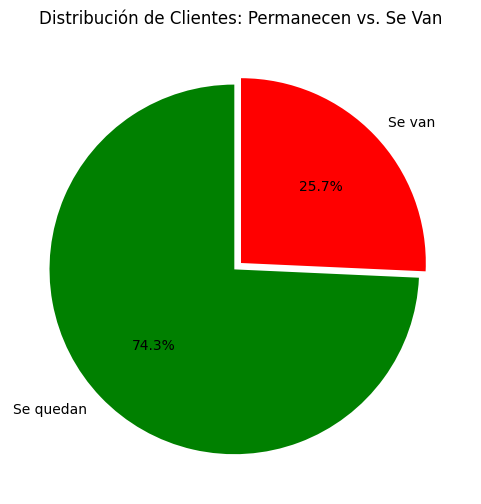

In [16]:
import matplotlib.pyplot as plt

# Contar cuántos clientes permanecieron (0) y cuántos se fueron (1)
conteo_churn = datos_norm['Churn'].value_counts()

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(
    conteo_churn.values,                # valores
    labels=['Se quedan', 'Se van'],     # etiquetas
    autopct='%1.1f%%',                  # mostrar porcentajes
    startangle=90,                      # inicio del gráfico
    colors=['green', 'red'],            # colores
    explode=(0.05, 0)                   # resaltar un poco la primera porción
)

plt.title('Distribución de Clientes: Permanecen vs. Se Van')
plt.show()


## **Recuento de evasión por variables categóricas**

### **Por genero**

/tmp/ipython-input-3357388390.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = datos_norm.groupby(['gender', 'Churn']).size().reset_index(name='count')
/tmp/ipython-input-3357388390.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo['porcentaje'] = grupo.groupby(['gender'])['count'].transform(lambda x: x / x.sum() * 100)
/tmp/ipython-input-3357388390.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = grupo.pivot_table(ind

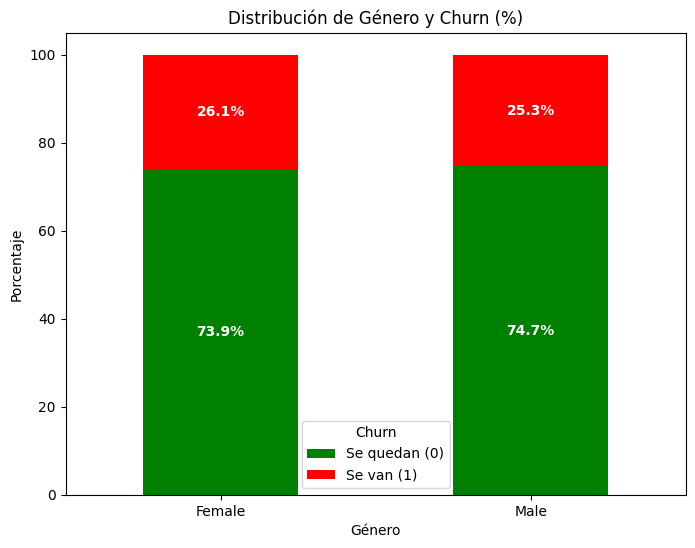

In [20]:
# Agrupar por género y churn
grupo = datos_norm.groupby(['gender', 'Churn']).size().reset_index(name='count')

# Normalizar por género para obtener porcentajes
grupo['porcentaje'] = grupo.groupby(['gender'])['count'].transform(lambda x: x / x.sum() * 100)

# Pivotear para gráfico apilado
pivot = grupo.pivot_table(index=['gender'], columns='Churn', values='porcentaje', fill_value=0)

# Crear gráfico de barras apiladas
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color={0: 'green', 1: 'red'}
)

plt.title('Distribución de Género y Churn (%)')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.legend(title='Churn', labels=['Se quedan (0)', 'Se van (1)'])
plt.xticks(rotation=0)

# --- Agregar etiquetas de porcentaje en medio de cada barra ---
for container in ax.containers:
    # Recorremos cada parte de la barra (verde y rojo)
    for bar in container:
        altura = bar.get_height()
        if altura > 0:  # solo si existe un segmento
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + altura / 2
            ax.text(x, y, f'{altura:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.show()

## **Por Tipo de Contrato**

/tmp/ipython-input-1288364886.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = datos_norm.groupby(['Contract', 'Churn']).size().reset_index(name='count')
/tmp/ipython-input-1288364886.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo['porcentaje'] = grupo.groupby(['Contract'])['count'].transform(lambda x: x / x.sum() * 100)
/tmp/ipython-input-1288364886.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = grupo.pivot_table

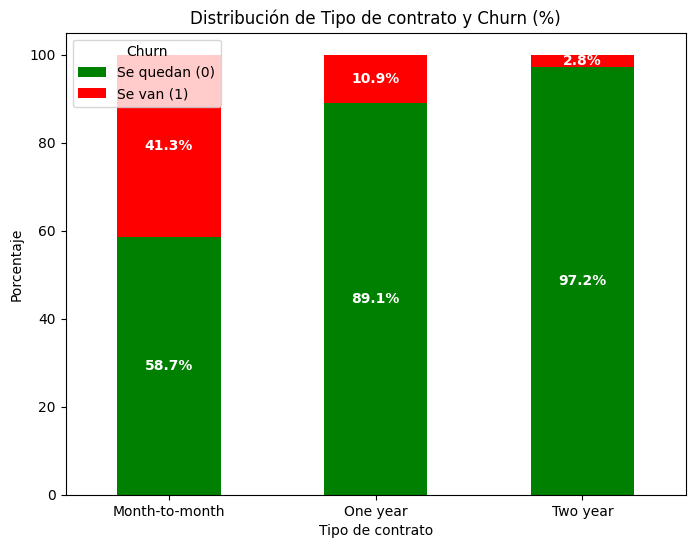

In [21]:
# Agrupar por tipo de contrato y churn
grupo = datos_norm.groupby(['Contract', 'Churn']).size().reset_index(name='count')

# Normalizar por género para obtener porcentajes
grupo['porcentaje'] = grupo.groupby(['Contract'])['count'].transform(lambda x: x / x.sum() * 100)

# Pivotear para gráfico apilado
pivot = grupo.pivot_table(index=['Contract'], columns='Churn', values='porcentaje', fill_value=0)

# Crear gráfico de barras apiladas
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color={0: 'green', 1: 'red'}
)

plt.title('Distribución de Tipo de contrato y Churn (%)')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de contrato')
plt.legend(title='Churn', labels=['Se quedan (0)', 'Se van (1)'])
plt.xticks(rotation=0)

# --- Agregar etiquetas de porcentaje en medio de cada barra ---
for container in ax.containers:
    # Recorremos cada parte de la barra (verde y rojo)
    for bar in container:
        altura = bar.get_height()
        if altura > 0:  # solo si existe un segmento
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + altura / 2
            ax.text(x, y, f'{altura:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.show()

### **Por forma de pago**

/tmp/ipython-input-3371046284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo = datos_norm.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')
/tmp/ipython-input-3371046284.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo['porcentaje'] = grupo.groupby(['PaymentMethod'])['count'].transform(lambda x: x / x.sum() * 100)
/tmp/ipython-input-3371046284.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = grupo.p

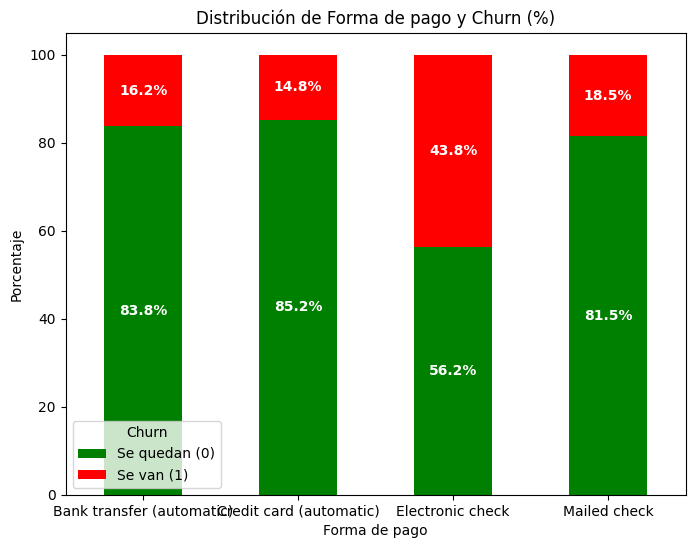

In [22]:
# Agrupar por forma de pago y churn
grupo = datos_norm.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='count')

# Normalizar por forma de pago para obtener porcentajes
grupo['porcentaje'] = grupo.groupby(['PaymentMethod'])['count'].transform(lambda x: x / x.sum() * 100)

# Pivotear para gráfico apilado
pivot = grupo.pivot_table(index=['PaymentMethod'], columns='Churn', values='porcentaje', fill_value=0)

# Crear gráfico de barras apiladas
ax = pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color={0: 'green', 1: 'red'}
)

plt.title('Distribución de Forma de pago y Churn (%)')
plt.ylabel('Porcentaje')
plt.xlabel('Forma de pago')
plt.legend(title='Churn', labels=['Se quedan (0)', 'Se van (1)'])
plt.xticks(rotation=0)

# --- Agregar etiquetas de porcentaje en medio de cada barra ---
for container in ax.containers:
    # Recorremos cada parte de la barra (verde y rojo)
    for bar in container:
        altura = bar.get_height()
        if altura > 0:  # solo si existe un segmento
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + altura / 2
            ax.text(x, y, f'{altura:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

plt.show()

## **Conteo de evasión por variables numéricas**

In [23]:
# Selecciona variables numéricas
variables_numericas = ['Charges.Total', 'tenure']

# Agrupar por churn y describir
resumen = datos_norm.groupby('Churn')[variables_numericas].describe().T
print(resumen)


Churn                          0            1
Charges.Total count  5387.000000  1869.000000
              mean   2540.440867  1531.796094
              std    2330.360507  1890.822994
              min      18.800000    18.850000
              25%     568.000000   134.500000
              50%    1669.400000   703.550000
              75%    4247.825000  2331.300000
              max    8672.450000  8684.800000
tenure        count  5398.000000  1869.000000
              mean     37.321045    17.979133
              std      24.178367    19.531123
              min       0.000000     1.000000
              25%      14.000000     2.000000
              50%      37.000000    10.000000
              75%      61.000000    29.000000
              max      72.000000    72.000000


/tmp/ipython-input-2996612593.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = datos_norm.groupby('Churn')[variables_numericas].describe().T


/tmp/ipython-input-2882440391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_norm, x='Churn', y=col, palette={'0': 'green', '1': 'red'})
/tmp/ipython-input-2882440391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_norm, x='Churn', y=col, palette={'0': 'green', '1': 'red'})


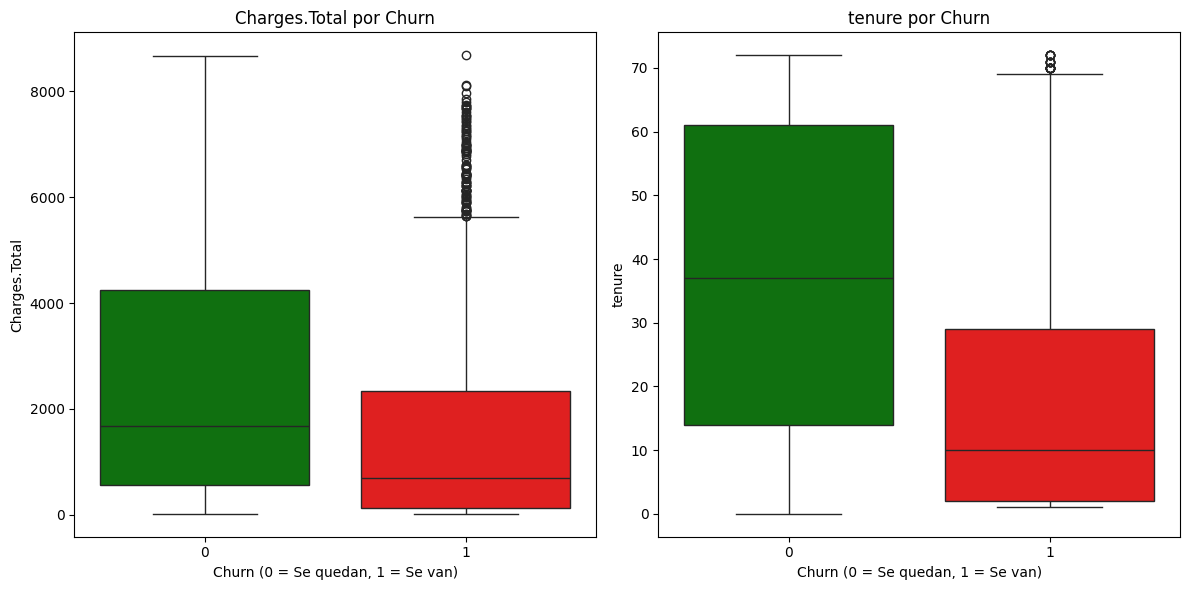

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for i, col in enumerate(variables_numericas, 1):
    plt.subplot(1, len(variables_numericas), i)
    sns.boxplot(data=datos_norm, x='Churn', y=col, palette={'0': 'green', '1': 'red'})
    plt.title(f'{col} por Churn')
    plt.xlabel('Churn (0 = Se quedan, 1 = Se van)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



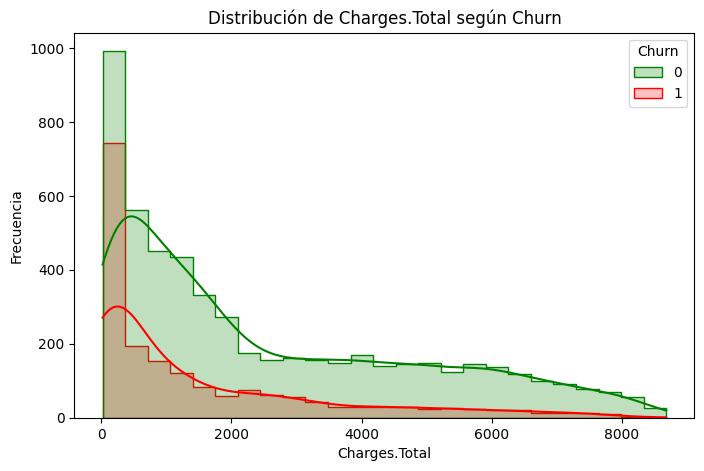

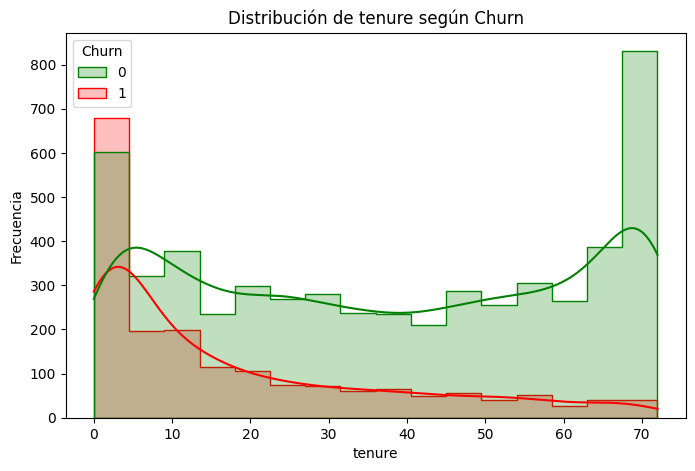

In [25]:
#Histogramas comparativos (densidad de clientes)
for col in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=datos_norm, x=col, hue='Churn', kde=True, element="step", palette={0: 'green', 1: 'red'})
    plt.title(f'Distribución de {col} según Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


In [26]:
#Comparación de medias con prueba estadística (opcional)
from scipy.stats import ttest_ind

for col in variables_numericas:
    grupo_se_quedan = datos_norm[datos_norm['Churn'] == 0][col]
    grupo_se_van = datos_norm[datos_norm['Churn'] == 1][col]

    t_stat, p_value = ttest_ind(grupo_se_quedan, grupo_se_van, equal_var=False)
    print(f"{col}: t={t_stat:.2f}, p={p_value:.4f}")


Charges.Total: t=nan, p=nan
tenure: t=34.61, p=0.0000


#📄Informe final

# 📊 Informe de Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este análisis es estudiar la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión, entendida como el abandono del servicio, representa un desafío importante para la retención de clientes y la sostenibilidad del negocio.
A través de este trabajo se busca identificar patrones y factores asociados al churn para proponer estrategias que reduzcan este fenómeno.

---

## 🔹 Limpieza y Tratamiento de Datos

Se utilizó un dataset en formato JSON con información de clientes, servicios contratados, tipo de pago y facturación.
Principales pasos de limpieza:

Normalización de datos: extracción de subcolumnas (customer, phone, internet, account).

Tratamiento de valores nulos y espacios vacíos en la variable Churn.

Conversión de tipos de datos:

Charges.Total → numérico.

Variables categóricas (gender, Partner, Contract, etc.) → categóricas.

Codificación binaria de variables "Yes/No" en 1/0.

Creación de variable derivada: Cuentas_diarias = Charges.Monthly / 30.

---

## 🔹 Análisis Exploratorio de Datos (EDA)
Distribución general de Churn

Clientes que se quedan: 74.3%

Clientes que se van: 25.7%

---
## Churn por Género

Mujeres que se quedan: 73.9% | Se van: 26.1%

Hombres que se quedan: 74.7% | Se van: 25.3%

---
## Churn por Tipo de Contrato

Mes a mes: 41.3% se van (alta evasión).

1 año: solo 10.9% se van.

2 años: apenas 2.8% se van.

---

## Churn por Forma de Pago

Electronic Check → mayor evasión (43.8%).

Métodos tradicionales (Transferencia bancaria, Tarjeta de crédito, Cheque) → evasión menor al 20%.

---
## Variables Numéricas

## Charges.Total (total gastado):

Los clientes que se quedan tienen mayor gasto acumulado promedio (≈2540) que los que se van (≈1532).

Diferencias significativas (p < 0.05).

## Tenure (tiempo de contrato):

Clientes que se quedan tienen una media de 37 meses.

Los que se van solo ≈18 meses en promedio.

Diferencia significativa (p < 0.05).

---


## 📌 Conclusiones e Insights

El tiempo de permanencia y el tipo de contrato son factores críticos: los clientes de contratos mensuales son los más propensos a irse.

El método de pago influye: los que usan "electronic check" presentan la mayor tasa de churn.

El gasto acumulado y mensual es menor en clientes que abandonan, lo que sugiere que clientes con menor uso/valor tienen más probabilidad de irse.

El género no representa una diferencia significativa en la evasión.

---
## 📌 Recomendaciones

Incentivar contratos de mayor plazo mediante descuentos o beneficios exclusivos para contratos de 1 o 2 años.

Reducir la fricción en métodos de pago: promover tarjeta de crédito o transferencia en lugar de electronic check.

Programas de retención temprana: detectar clientes con baja permanencia (menos de 12 meses) y bajo gasto acumulado → ofrecer promociones o atención personalizada.

Segmentación de clientes en riesgo usando variables clave (tenure, tipo de contrato, método de pago) para campañas preventivas.

